# Rain Model

#### Import the pre-made model:

In [2]:
import sys
sys.path.append('..')
from tests import get_example_model

model=get_example_model('rain')

##### This model has the following structure and CPDs:
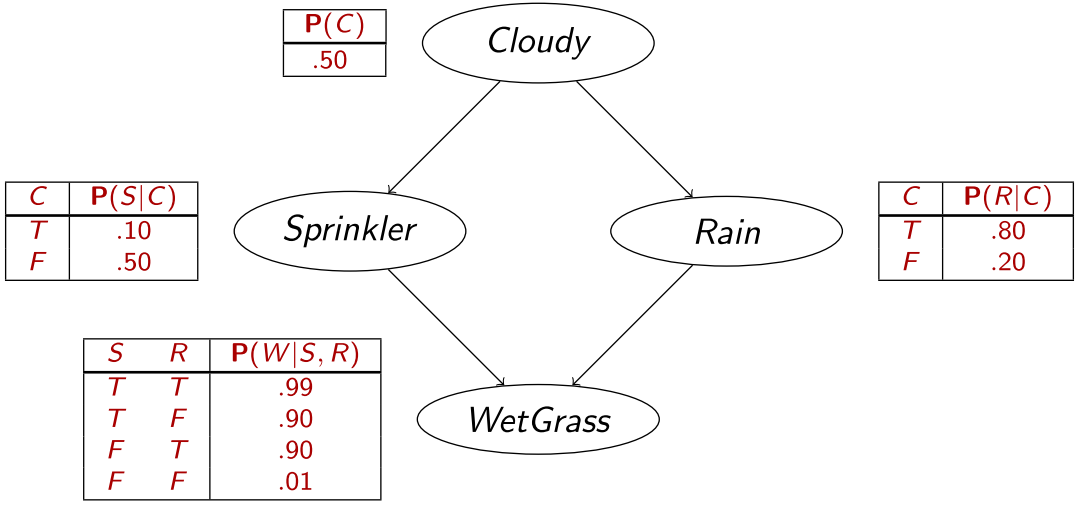

#### Let's check the model structure:

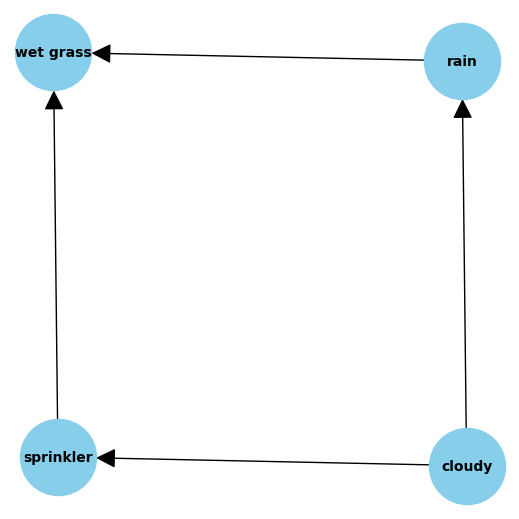

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

edges = model.edges()
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(5,5))

pos = nx.spectral_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=3000, node_color="skyblue", font_size=10, arrowsize=30)

#### Let's check the CPDs:

In [4]:
for cpd in model.get_cpds():
    pass
    print(f"CPD of {cpd.variable}: \n{cpd}")

CPD of cloudy: 
+-----------+-----+
| cloudy(0) | 0.5 |
+-----------+-----+
| cloudy(1) | 0.5 |
+-----------+-----+
CPD of sprinkler: 
+--------------+-----------+-----------+
| cloudy       | cloudy(0) | cloudy(1) |
+--------------+-----------+-----------+
| sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+
CPD of rain: 
+---------+-----------+-----------+
| cloudy  | cloudy(0) | cloudy(1) |
+---------+-----------+-----------+
| rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+
CPD of wet grass: 
+--------------+--------------+--------------+--------------+--------------+
| sprinkler    | sprinkler(0) | sprinkler(0) | sprinkler(1) | sprinkler(1) |
+--------------+--------------+--------------+--------------+--------------+
| rain         | rain(0)      | rain(1)      | rain(0)      | 

## Queries

#### At this point, let's compare the queries resulting from the standard variable elimination by `pgmpy` and the Gibbs sampling implemented

In [5]:
from pgmpy.inference import VariableElimination
from inference import GibbsSampling

inference = VariableElimination(model)
gibbs = GibbsSampling(model)

In [7]:
q1={'variables':[
        'cloudy',
        'rain',
        ],
    'evidence':{
        'sprinkler':1,
        'wet grass':1,
        }}
print(f'Variable Elimination:\n{inference.query(**q1)}')
print(f'Gibbs Sampling:\n{gibbs.query(**q1)}')

Variable Elimination:
+-----------+---------+--------------------+
| cloudy    | rain    |   phi(cloudy,rain) |
+===========+=========+====================+
| cloudy(0) | rain(0) |             0.6472 |
+-----------+---------+--------------------+
| cloudy(0) | rain(1) |             0.1780 |
+-----------+---------+--------------------+
| cloudy(1) | rain(0) |             0.0324 |
+-----------+---------+--------------------+
| cloudy(1) | rain(1) |             0.1424 |
+-----------+---------+--------------------+
Gibbs Sampling:
+-----------+---------+--------------------+
| cloudy    | rain    |   phi(cloudy,rain) |
+===========+=========+====================+
| cloudy(0) | rain(0) |             0.6493 |
+-----------+---------+--------------------+
| cloudy(0) | rain(1) |             0.1768 |
+-----------+---------+--------------------+
| cloudy(1) | rain(0) |             0.0325 |
+-----------+---------+--------------------+
| cloudy(1) | rain(1) |             0.1414 |
+-----------+----

In [8]:
q2={'variables':[
        'cloudy',
        'rain',
        ],
    'evidence':{
        'sprinkler':0,
        'wet grass':0,
        }}  
print(f'Variable Elimination:\n{inference.query(**q2)}')
print(f'Gibbs Sampling:\n{gibbs.query(**q2)}')

Variable Elimination:
+-----------+---------+--------------------+
| cloudy    | rain    |   phi(cloudy,rain) |
+===========+=========+====================+
| cloudy(0) | rain(0) |             0.6035 |
+-----------+---------+--------------------+
| cloudy(0) | rain(1) |             0.0152 |
+-----------+---------+--------------------+
| cloudy(1) | rain(0) |             0.2716 |
+-----------+---------+--------------------+
| cloudy(1) | rain(1) |             0.1097 |
+-----------+---------+--------------------+
Gibbs Sampling:
+-----------+---------+--------------------+
| cloudy    | rain    |   phi(cloudy,rain) |
+===========+=========+====================+
| cloudy(0) | rain(0) |             0.6040 |
+-----------+---------+--------------------+
| cloudy(0) | rain(1) |             0.0160 |
+-----------+---------+--------------------+
| cloudy(1) | rain(0) |             0.2694 |
+-----------+---------+--------------------+
| cloudy(1) | rain(1) |             0.1106 |
+-----------+----

In [9]:
q3={'variables':[
        'cloudy',
        'sprinkler'
        ],
    'evidence':{
        'wet grass':0,
        }}
print(f'Variable Elimination:\n{inference.query(**q3)}')
print(f'Gibbs Sampling:\n{gibbs.query(**q3)}')

Variable Elimination:
+-----------+--------------+-------------------------+
| cloudy    | sprinkler    |   phi(cloudy,sprinkler) |
+===========+==============+=========================+
| cloudy(0) | sprinkler(0) |                  0.5800 |
+-----------+--------------+-------------------------+
| cloudy(0) | sprinkler(1) |                  0.0586 |
+-----------+--------------+-------------------------+
| cloudy(1) | sprinkler(0) |                  0.3574 |
+-----------+--------------+-------------------------+
| cloudy(1) | sprinkler(1) |                  0.0040 |
+-----------+--------------+-------------------------+
Gibbs Sampling:
+-----------+--------------+-------------------------+
| cloudy    | sprinkler    |   phi(cloudy,sprinkler) |
+===========+==============+=========================+
| cloudy(0) | sprinkler(0) |                  0.5797 |
+-----------+--------------+-------------------------+
| cloudy(0) | sprinkler(1) |                  0.0569 |
+-----------+--------------

In [10]:
q4={'variables':[
        'wet grass',
        ],
    'evidence':{
        'cloudy':1,
        }}
print(f'Variable Elimination:\n{inference.query(**q4)}')
print(f'Gibbs Sampling:\n{gibbs.query(**q4)}')

Variable Elimination:
+--------------+------------------+
| wet grass    |   phi(wet grass) |
+==============+==================+
| wet grass(0) |           0.2530 |
+--------------+------------------+
| wet grass(1) |           0.7470 |
+--------------+------------------+
Gibbs Sampling:
+--------------+------------------+
| wet grass    |   phi(wet grass) |
+==============+==================+
| wet grass(0) |           0.2578 |
+--------------+------------------+
| wet grass(1) |           0.7422 |
+--------------+------------------+

